### Example notebook demonstrating the workflow for using quantum kernel methods for solving regression problems

Example based on:

- Fidelity Quantum Kernel (FQK)
- QGPRS

In [1]:
# necessary imports
import numpy as np
from squlearn.util import Executor
from squlearn.feature_map import ChebPQC
from squlearn.kernel import FidelityKernel
from squlearn.kernel import QGPR

C:\Users\jsl\AppData\Roaming\Python\Python310\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: skit-terra is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\jsl\AppData\Roaming\Python\Python310\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: skit-aer is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
# Generate training data.
def func(x):
    return np.sin(3 * x) * x * x


noise_std = 0.1
X_test = np.linspace(-1, 1, 100)
Y_test = func(X_test)
X_train = np.linspace(-1, 1, 15)
Y_train = func(X_train) + np.random.normal(scale=noise_std, size=len(X_train))

In [3]:
# set up FQK and define inducing feature map
num_qubits = 6
fmap = ChebPQC(num_qubits, num_features=1, num_layers=2)
q_kernel = FidelityKernel(
    feature_map=fmap, executor=Executor("statevector_simulator"), parameter_seed=0
)

In [4]:
# Define Method for solving regresison problem.
# The model can be changed (i.e., e.g. QKRR or QSVR) and used analogously to QGPR
qgpr_model = QGPR(quantum_kernel=q_kernel, sigma=noise_std**2)

# Perform fit step
qgpr_model.fit(X_train=X_train.reshape(-1, 1), y_train=Y_train)

# perform predict step and return mean prediction as well as std
# (note this is only possible for QGPR. QKRR and QSVR only return a single prediction)
qgpr_mean, qgpr_std = qgpr_model.predict(X_test=X_test.reshape(-1, 1), return_std=True)

Regularizing full Gram matrix
Reconstruction error 1.8351863431687043e-11


Text(0, 0.5, '$f(x)$')

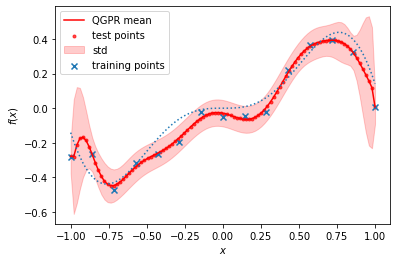

In [5]:
from matplotlib import pyplot as plt

# plot result
plt.plot(X_test.reshape(-1, 1), qgpr_mean, color="red", label="QGPR mean")
plt.scatter(
    X_test.reshape(-1, 1), qgpr_mean, marker=".", label="test points", color="red", alpha=0.7
)
plt.fill_between(
    X_test.reshape(-1),
    qgpr_mean.reshape(-1) - qgpr_std,
    qgpr_mean.reshape(-1) + qgpr_std,
    color="red",
    label="std",
    alpha=0.2,
)
plt.scatter(X_train, Y_train, marker="x", label="training points")
plt.plot(X_test, Y_test, linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(qgpr_model, X_train.reshape(-1, 1), Y_train, cv=5)

Regularizing full Gram matrix
Reconstruction error 1.8629542353210127e-13
Regularizing full Gram matrix
Reconstruction error 8.99714330815371e-14
Regularizing full Gram matrix
Reconstruction error 1.1939928212800766e-13
Regularizing full Gram matrix
Reconstruction error 1.2382282699174851e-13
Regularizing full Gram matrix
Reconstruction error 6.314740397250773e-14


array([  -7.76255629,   -3.01323265, -129.82313618,    0.65758134,
         -0.79796283])